In [1]:
#creating a class for reading multiple files

class read_multiplefiles(object):

    def __init__(self, dir_path):

        self.dir_path = dir_path



    def __iter__(self):

        for filename in os.listdir(self.dir_path):

            for line in open(os.path.join(self.dir_path, filename), encoding='utf-8'):

                yield simple_preprocess(line)



#providing the path of the directory   
              
directory_path = r"C:\Users\ASUS\Desktop\corpus text"

In [2]:
#importing required libraries

from gensim.utils import simple_preprocess

from smart_open import smart_open

from gensim import corpora

import os


In [3]:
import os, os.path

In [4]:
corpus_root = os.path.expanduser('C:/Users/ASUS/Desktop/corpus text')

In [5]:
import nltk
from nltk.corpus import PlaintextCorpusReader

In [6]:
corpus = PlaintextCorpusReader(corpus_root, '.*')

In [7]:
corpus.words()

['AI', 'And', 'Machine', 'Learning', 'Artificial', ...]

In [8]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import gensim
import networkx as nx
import pandas as pd

from collections import defaultdict, Counter

wordnet = nltk.WordNetLemmatizer()
stemmer = nltk.SnowballStemmer('english')
stoplist = stopwords.words('english')

In [9]:
def normalize_token(token):
    """
    Convert token to lowercase, and stem using the Porter algorithm.

    Parameters
    ----------
    token : str

    Returns
    -------
    token : str
    """
    return wordnet.lemmatize(token.lower())

def filter_token(token):
    """
    Evaluate whether or not to retain ``token``.

    Parameters
    ----------
    token : str

    Returns
    -------
    keep : bool
    """
    token = token.lower()
    return token not in stoplist and token.isalpha() and len(token) > 2

In [10]:
documents=[[normalize_token(token) 
            for token in corpus.words(fileids=[fileid])
            if filter_token(token)]
           for fileid in corpus.fileids()]

In [11]:
wordcounts = nltk.FreqDist([token for document in documents for token in document])

In [12]:
wordcounts

FreqDist({'data': 3497, 'business': 2443, 'company': 1957, 'technology': 1704, 'learning': 1567, 'use': 1394, 'organization': 1375, 'analytics': 1245, 'service': 1231, 'new': 1140, ...})

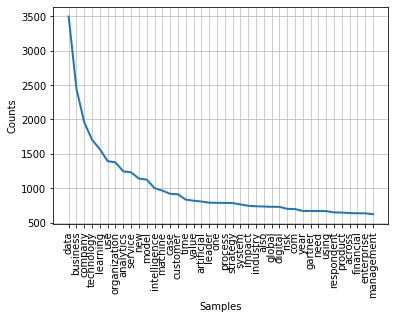

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
wordcounts.plot(40)

In [14]:
documentcounts = nltk.FreqDist([token for document in documents for token in set(document)])

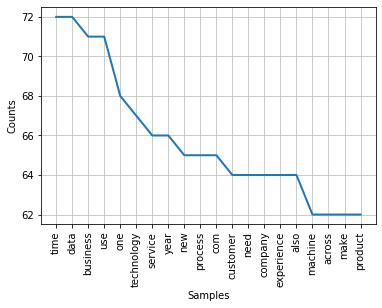

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
documentcounts.plot(20)

In [16]:
filtered_documents = [[token for token in document 
                      if wordcounts[token] < 2000
                      and 1 < documentcounts[token] < 350]
                     for document in documents]

In [17]:
dictionary = gensim.corpora.Dictionary(filtered_documents)

In [18]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['data','finance','lung','cancer','model', 'new','use','case','also','food','finance','gartner','alteryx','idc','mckinsey','deloitte']))

In [19]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'alteryx',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside'

In [20]:
def filter_token_revised(token):
    """
    Evaluate whether or not to retain ``token``.

    Parameters
    ----------
    token : str

    Returns
    -------
    keep : bool
    """
    token = token.lower()
    return token not in my_stop_words and token.isalpha() and len(token) > 2

In [21]:
documents_v2=[[normalize_token(token) 
            for token in corpus.words(fileids=[fileid])
            if filter_token_revised(token)]
           for fileid in corpus.fileids()]

In [22]:
from nltk.util import ngrams

In [23]:
[gram for gram in nltk.bigrams(corpus.words())][:]

[('AI', 'And'),
 ('And', 'Machine'),
 ('Machine', 'Learning'),
 ('Learning', 'Artificial'),
 ('Artificial', 'Intelligence'),
 ('Intelligence', 'for'),
 ('for', 'the'),
 ('the', 'Real'),
 ('Real', 'World'),
 ('World', 'by'),
 ('by', 'Thomas'),
 ('Thomas', 'H'),
 ('H', '.'),
 ('.', 'Davenport'),
 ('Davenport', 'and'),
 ('and', 'Rajeev'),
 ('Rajeev', 'Ronanki'),
 ('Ronanki', 'From'),
 ('From', 'the'),
 ('the', 'Magazine'),
 ('Magazine', '('),
 ('(', 'January'),
 ('January', '–'),
 ('–', 'February'),
 ('February', '2018'),
 ('2018', ')'),
 (')', 'James'),
 ('James', 'Wheaton'),
 ('Wheaton', 'and'),
 ('and', 'Andrew'),
 ('Andrew', 'Nguyen'),
 ('Nguyen', 'Summary'),
 ('Summary', '.'),
 ('.', 'Cognitive'),
 ('Cognitive', 'technologies'),
 ('technologies', 'are'),
 ('are', 'increasingly'),
 ('increasingly', 'being'),
 ('being', 'used'),
 ('used', 'to'),
 ('to', 'solve'),
 ('solve', 'business'),
 ('business', 'problems'),
 ('problems', ';'),
 (';', 'indeed'),
 ('indeed', ','),
 (',', 'many'),
 

In [24]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(corpus.words())

In [25]:
finder.nbest(bigram_measures.pmi, 10)

[('!!', 'Whaaaaaaaaaaaaat'),
 ('$$', '$$$$'),
 ('$$$$', '$$$$$'),
 ('$$$$$', '$$$$$$$$'),
 ('(&', 'Realities'),
 ('*,', 'Mozziyar'),
 ('.;', 'Dublin'),
 ('/~', 'juergen'),
 ('1003', '1006'),
 ('1007', '1001')]

In [26]:
finder.apply_freq_filter(4)

In [27]:
finder.nbest(bigram_measures.pmi, 200)

[('Accounts', 'Receivable'),
 ('Athina', 'Kanioura'),
 ('LEADING', 'PRACTICE'),
 ('WATCH', 'VIDEO'),
 ('Anthony', 'Mullen'),
 ('Demis', 'Hassabis'),
 ('Goldman', 'Sachs'),
 ('Khaled', 'Rifai'),
 ('GLOBAL', 'EXECUTIVE'),
 ('Naive', 'Bayes'),
 ('Susanne', 'Hupfer'),
 ('proj', 'ect'),
 ('\uf239', '\uf243'),
 ('Avi', 'Goldfarb'),
 ('Canary', 'Wharf'),
 ('Frances', 'Karamouzis'),
 ('Kaiser', 'Permanente'),
 ('Sree', 'Ramaswamy'),
 ('Wells', 'Fargo'),
 ('Yoshua', 'Bengio'),
 ('ANY', 'WARRANTY'),
 ('Busch', 'InBev'),
 ('DEPLOYMENT', 'LEVELS'),
 ('Monica', 'Trench'),
 ('WITHOUT', 'ANY'),
 ('fehlt', 'es'),
 ('Telephone', 'Laboratories'),
 ('213', '4848'),
 ('306', '809'),
 ('3331', '306'),
 ('Aaron', 'Courville'),
 ('Bell', 'Telephone'),
 ('Cade', 'Metz'),
 ('Clara', 'Guardian'),
 ('Farhan', 'Choudhary'),
 ('Frank', 'Rosenblatt'),
 ('Jonathan', 'Woetzel'),
 ('Logic', 'Theorist'),
 ('Morning', 'Consult'),
 ('REPLACE', 'IMAGE'),
 ('Weak', 'Vs'),
 ('Erik', 'Brynjolfsson'),
 ('Beena', 'Ammanath'),


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
tagged_words = nltk.pos_tag(corpus.words())

In [30]:
tagged_words[:10]

[('AI', 'NNP'),
 ('And', 'CC'),
 ('Machine', 'NNP'),
 ('Learning', 'NNP'),
 ('Artificial', 'NNP'),
 ('Intelligence', 'NNP'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('Real', 'NNP'),
 ('World', 'NNP')]

In [31]:
finder = nltk.collocations.BigramCollocationFinder.from_words(tagged_words)
finder.apply_freq_filter(5)

In [32]:
# Only keep nouns (noun POS tags all start with ``N``).
word_filter = lambda token: not (filter_token(token[0]) and token[1].startswith('N'))
finder.apply_word_filter(word_filter)

In [33]:
>>> finder.apply_word_filter(lambda w: w in my_stop_words)

In [34]:
finder.nbest(bigram_measures.pmi, 10)

[(('Anthony', 'NNP'), ('Mullen', 'NNP')),
 (('Demis', 'NNP'), ('Hassabis', 'NNP')),
 (('Goldman', 'NNP'), ('Sachs', 'NNP')),
 (('Khaled', 'NNP'), ('Rifai', 'NNP')),
 (('Avi', 'NNP'), ('Goldfarb', 'NNP')),
 (('Canary', 'NNP'), ('Wharf', 'NNP')),
 (('Frances', 'NNP'), ('Karamouzis', 'NNP')),
 (('Kaiser', 'NNP'), ('Permanente', 'NNP')),
 (('Sree', 'NNP'), ('Ramaswamy', 'NNP')),
 (('Wells', 'NNP'), ('Fargo', 'NNP'))]

In [35]:
finder.score_ngrams(bigram_measures.pmi)[20:]

[((('RESHAPING', 'NN'), ('BUSINESS', 'NN')), 16.21311846269082),
 ((('Beena', 'NNP'), ('Ammanath', 'NNP')), 16.061115369245766),
 ((('Irfan', 'NNP'), ('Saif', 'NNP')), 16.061115369245766),
 ((('Ian', 'NNP'), ('Goodfellow', 'NNP')), 15.990726041354371),
 ((('Jeffrey', 'NNP'), ('Dean', 'NNP')), 15.990726041354371),
 ((('Erick', 'NNP'), ('Brethenoux', 'NNP')), 15.891190367803457),
 ((('Van', 'NNP'), ('Buren', 'NNP')), 15.891190367803457),
 ((('Hours', 'NNP'), ('Saved', 'NNP')), 15.891190367803453),
 ((('Monte', 'NNP'), ('Carlo', 'NNP')), 15.891190367803453),
 ((('Tim', 'NNP'), ('Fountaine', 'NNP')), 15.891190367803453),
 ((('Whit', 'NNP'), ('Andrews', 'NNP')), 15.891190367803453),
 ((('CHANGELET', 'NNP'), ('THEREBE', 'NNP')), 15.739187274358407),
 ((('Janakiram', 'NNP'), ('MSV', 'NNP')), 15.739187274358407),
 ((('THEREBE', 'NNP'), ('CHANGELET', 'NNP')), 15.739187274358407),
 ((('Svetlana', 'NNP'), ('Sicular', 'NNP')), 15.739187274358406),
 ((('Rethinking', 'NNP'), ('Weak', 'NNP')), 15.739

In [36]:
remove_peoples_name = ['Anthony', 'Mullen', 'Demis', 'Hassabis', 'Goldman', 'Sachs', 'Khaled', 'Rifai', 'Avi', 'Goldfarb', 'Canary', 'Wharf',
 'Frances', 'Karamouzis', 'Kaiser', 'Permanente', 'Sree', 'Ramaswamy', 'Wells', 'Fargo', 'Yoshua', 'Bengio', 'Bell', 'Telephone', 'Cade', 'Metz',
 'Clara', 'Guardian', 'Farhan', 'Choudhary','Shubhangi', 'Vashisth', 'Erik', 'Brynjolfsson']
remove_peoples_name = STOPWORDS.union(set(remove_peoples_name))

In [37]:
finder.apply_word_filter(lambda w: w in remove_peoples_name)

In [38]:
ngram, score = zip(*[g for g in finder.score_ngrams(bigram_measures.pmi)])

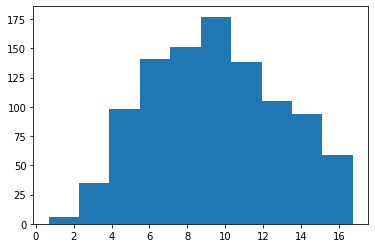

In [39]:
plt.hist(score)
plt.show()

In [40]:
selected_ngrams = [ngram for ngram in finder.above_score(bigram_measures.pmi, 2.0)]
selected_ngrams[20:]

[(('RESHAPING', 'NN'), ('BUSINESS', 'NN')),
 (('Beena', 'NNP'), ('Ammanath', 'NNP')),
 (('Irfan', 'NNP'), ('Saif', 'NNP')),
 (('Ian', 'NNP'), ('Goodfellow', 'NNP')),
 (('Jeffrey', 'NNP'), ('Dean', 'NNP')),
 (('Erick', 'NNP'), ('Brethenoux', 'NNP')),
 (('Van', 'NNP'), ('Buren', 'NNP')),
 (('Hours', 'NNP'), ('Saved', 'NNP')),
 (('Monte', 'NNP'), ('Carlo', 'NNP')),
 (('Tim', 'NNP'), ('Fountaine', 'NNP')),
 (('Whit', 'NNP'), ('Andrews', 'NNP')),
 (('CHANGELET', 'NNP'), ('THEREBE', 'NNP')),
 (('Janakiram', 'NNP'), ('MSV', 'NNP')),
 (('THEREBE', 'NNP'), ('CHANGELET', 'NNP')),
 (('Svetlana', 'NNP'), ('Sicular', 'NNP')),
 (('Rethinking', 'NNP'), ('Weak', 'NNP')),
 (('Sankalp', 'NNP'), ('Malhotra', 'NNP')),
 (('Screening', 'NNP'), ('Trial', 'NNP')),
 (('Protection', 'NNP'), ('Regulation', 'NNP')),
 (('Silicon', 'NNP'), ('Valley', 'NNP')),
 (('View', 'NNP'), ('upcoming', 'NN')),
 (('Middle', 'NNP'), ('East', 'NNP')),
 (('Nitin', 'NNP'), ('Mittal', 'NNP')),
 (('Resource', 'NNP'), ('Planning', 'NN

In [41]:
selected_expressions = []
for (token1, pos1), (token2, pos2) in finder.above_score(bigram_measures.pmi, 2.0):
    selected_expressions.append((token1, token2))

selected_expressions[:20]

[('Anthony', 'Mullen'),
 ('Demis', 'Hassabis'),
 ('Goldman', 'Sachs'),
 ('Khaled', 'Rifai'),
 ('Avi', 'Goldfarb'),
 ('Canary', 'Wharf'),
 ('Frances', 'Karamouzis'),
 ('Kaiser', 'Permanente'),
 ('Sree', 'Ramaswamy'),
 ('Wells', 'Fargo'),
 ('Yoshua', 'Bengio'),
 ('Bell', 'Telephone'),
 ('Cade', 'Metz'),
 ('Clara', 'Guardian'),
 ('Farhan', 'Choudhary'),
 ('Logic', 'Theorist'),
 ('REPLACE', 'IMAGE'),
 ('Recent', 'Developments'),
 ('Shubhangi', 'Vashisth'),
 ('Erik', 'Brynjolfsson')]

In [42]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

In [43]:
documents=[[normalize_token(token) 
            for token in corpus.words(fileids=[fileid])
            if filter_token(token)]
           for fileid in corpus.fileids()]

In [44]:
tokenizer = nltk.MWETokenizer(selected_expressions)

In [45]:
wordcounts = nltk.FreqDist([token for document in documents_v2 for token in document])

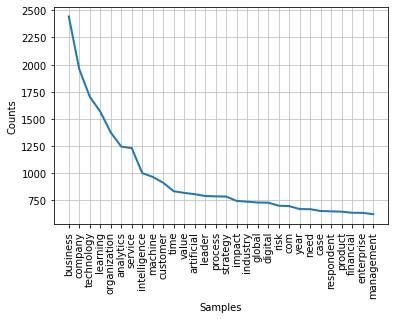

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
wordcounts.plot(30)

In [47]:
documentcounts = nltk.FreqDist([token for document in documents_v2 for token in set(document)])

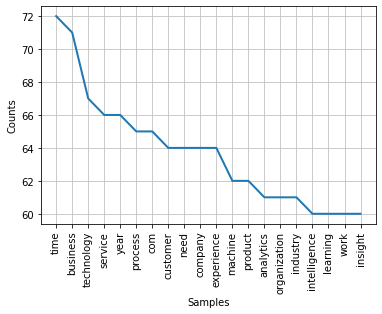

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [48]:
documentcounts.plot(20)

In [49]:
filtered_documents_v2 = [[token for token in document 
                      if wordcounts[token] > 700
                      and 1 < documentcounts[token] < 350]
                     for document in documents_v2]

In [50]:
dictionary = gensim.corpora.Dictionary(filtered_documents_v2)

In [51]:
documents_bow = [dictionary.doc2bow(document) for document in filtered_documents_v2]

In [52]:
model = gensim.models.LdaModel(documents_bow, 
                               id2word=dictionary,
                               num_topics=12, 
                               update_every=0,
                               passes=20)

In [53]:
for i, topic in enumerate(model.print_topics(num_topics=12, num_words=10)):
    print (i, ':', topic)

0 : (0, '0.365*"learning" + 0.132*"machine" + 0.090*"company" + 0.065*"business" + 0.054*"value" + 0.044*"time" + 0.034*"technology" + 0.029*"customer" + 0.025*"service" + 0.024*"process"')
1 : (1, '0.192*"global" + 0.168*"value" + 0.120*"company" + 0.083*"business" + 0.073*"industry" + 0.055*"analytics" + 0.042*"learning" + 0.042*"impact" + 0.039*"service" + 0.037*"customer"')
2 : (2, '0.160*"machine" + 0.141*"intelligence" + 0.128*"learning" + 0.114*"artificial" + 0.088*"technology" + 0.085*"digital" + 0.058*"time" + 0.035*"company" + 0.034*"global" + 0.025*"business"')
3 : (3, '0.310*"customer" + 0.257*"service" + 0.087*"business" + 0.072*"time" + 0.038*"company" + 0.032*"process" + 0.031*"value" + 0.029*"intelligence" + 0.027*"digital" + 0.026*"industry"')
4 : (4, '0.207*"organization" + 0.197*"leader" + 0.098*"business" + 0.075*"time" + 0.070*"technology" + 0.042*"impact" + 0.033*"customer" + 0.028*"process" + 0.027*"global" + 0.027*"intelligence"')
5 : (5, '0.302*"technology" + 0

In [64]:
!py -m pip install wheel

In [62]:
pip install –upgrade wheel

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '–upgrade'


In [63]:
!pip install python_package.whl

ERROR: python_package.whl is not a valid wheel filename.


In [57]:
!python -m pip install -U pip setuptools


  Using cached pip-22.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 50.3.1.post20201107
    Uninstalling setuptools-50.3.1.post20201107:
      Successfully uninstalled setuptools-50.3.1.post20201107


In [68]:
!pip install guidedlda

  Using cached guidedlda-2.0.0.dev22.tar.gz (2.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for guidedlda
Failed to build guidedlda
  Running setup.py install for guidedlda: started
  Running setup.py install for guidedlda: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [110 lines of output]
  c:\users\asus\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  c:\users\asus\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'author-email' will not be supported in future versions. Please use the underscore name 'author_email' instead
    warnings.warn(
  c:\users\asus\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'pre-hook.sdist_pre_hook' will not be supported in future versions. Please use the underscore name 'pre_hook.sdist_pre_hook' instead
    warnings.warn(
  c:\users\asus\anaconda3\lib\site-packages\setuptools\dist.py:58: DistDeprecationWarning: Do not call this function
    warni

In [69]:
!python -m pip install –-upgrade pip

ERROR: Invalid requirement: '–-upgrade'


In [55]:
import guidedlda

ModuleNotFoundError: No module named 'guidedlda'

In [ ]:
!pip install lda

In [ ]:
from lda import guidedlda as glda

In [ ]:
!pip install lda


In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [ ]:
model.print_topics[1]

In [ ]:
# Start with one review:


for i, topic in enumerate(model.print_topics(num_topics=4, num_words=10)):
    text = topic[i]
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, documents_bow, dictionary)

In [ ]:
from gensim import models

tfidf = models.TfidfModel(documents_bow)

In [ ]:
corpus_tfidf = tfidf[documents_bow]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=2, id2word=dictionary, passes=2, workers=4)

In [ ]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=15)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-ls

In [ ]:
lsi_model.print_topics(15)

In [ ]:
def compute_coherence_values(dictionary, corpus, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, dictionary=dictionary,corpus = corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=documents_bow, limit=40, start=2, step=6)


In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def compute_coherence_values_lsi(dictionary, corpus, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LsiModel(corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, dictionary=dictionary,corpus = corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values_lsi(dictionary=dictionary, corpus=documents_bow, limit=40, start=2, step=6)

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
#creating a dictionary 

gensim_dictionary = corpora.Dictionary()


In [ ]:
#creating a bag-of-words corpus from multiple files in the directory provided

gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in read_multiplefiles(directory_path)]

In [ ]:
#displaying the contents in readable format

word_frequencies = [[(gensim_dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

print(word_frequencies)


In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

In [ ]:
corpus_root = os.path.expanduser('~/nltk_data/corpora/your_corpus')